# **Heart Disease Prediction**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **EDA**

Heart disease is a broad term used for diseases and conditions affecting the heart and circulatory system. They are also referred to as cardiovascular diseases. It is a major cause of disability all around the world.Since heart is amongst the most vital organs of the body, its diseases affect other organs and part of the body as well.

There are several different types and forms of heart disease. The most common ones cause narrowing or blockage of the coronary arteries, malfunctioning in the valves of the heart, enlargement in the size of heart, and several others leading to heart failure and heart attack. 

source : https://www.indushealthplus.com/heart-diseases.html



### Dataset Description

The dataset contains the following variables:

- **age**: Age in years  
- **sex**: Sex  
    - 1 = male  
    - 0 = female  
- **cp**: Chest pain type  
    - Value 0: Typical angina  
    - Value 1: Atypical angina  
    - Value 2: Non-anginal pain  
    - Value 3: Asymptomatic  
- **trestbps**: Resting blood pressure (in mm Hg on admission to the hospital)  
- **chol**: Serum cholesterol in mg/dl  
- **fbs**: (Fasting blood sugar > 120 mg/dl)  
    - 1 = true  
    - 0 = false  
- **restecg**: Resting electrocardiographic results  
    - Value 0: Normal  
    - Value 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)  
    - Value 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria  
- **thalach**: Maximum heart rate achieved  
- **exang**: Exercise-induced angina  
    - 1 = yes  
    - 0 = no  
- **oldpeak**: ST depression induced by exercise relative to rest  
- **slope**: The slope of the peak exercise ST segment  
    - Value 0: Upsloping  
    - Value 1: Flat  
    - Value 2: Downsloping  
- **ca**: Number of major vessels (0-3) colored by fluoroscopy  
- **thal**:  
    - 0 = Error (in the original dataset, 0 maps to NaN's)  
    - 1 = Fixed defect  
    - 2 = Normal  
    - 3 = Reversible defect  
- **target** (the label):  
    - 0 = No disease  
    - 1 = Disease  

### Dataset exploration 

In [117]:
def load_df():
    global df 
    df = pd.read_csv("D:\jupyter\smart-healthcare-ai\data\heart.csv")
    return df

load_df()

<>:3: SyntaxWarning: invalid escape sequence '\j'
<>:3: SyntaxWarning: invalid escape sequence '\j'
C:\Users\User\AppData\Local\Temp\ipykernel_1200\3216371549.py:3: SyntaxWarning: invalid escape sequence '\j'
  df = pd.read_csv("D:\jupyter\smart-healthcare-ai\data\heart.csv")


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [32]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [33]:
df.ca.value_counts()

ca
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64

"ca" represents how many major blood vessels (0–3) show up in a fluoroscopy test. <br>
Should only be 0, 1, 2, or 3 — anything else is invalid.

In [118]:
df.drop(df[df['ca'] == 4].index, inplace=True)
df['ca'].value_counts()
df.shape

(298, 14)

"O" refers to the NaNs 

In [119]:
df.drop(df[(df['thal'] == 0)].index,inplace=True)

### Data Visualization 

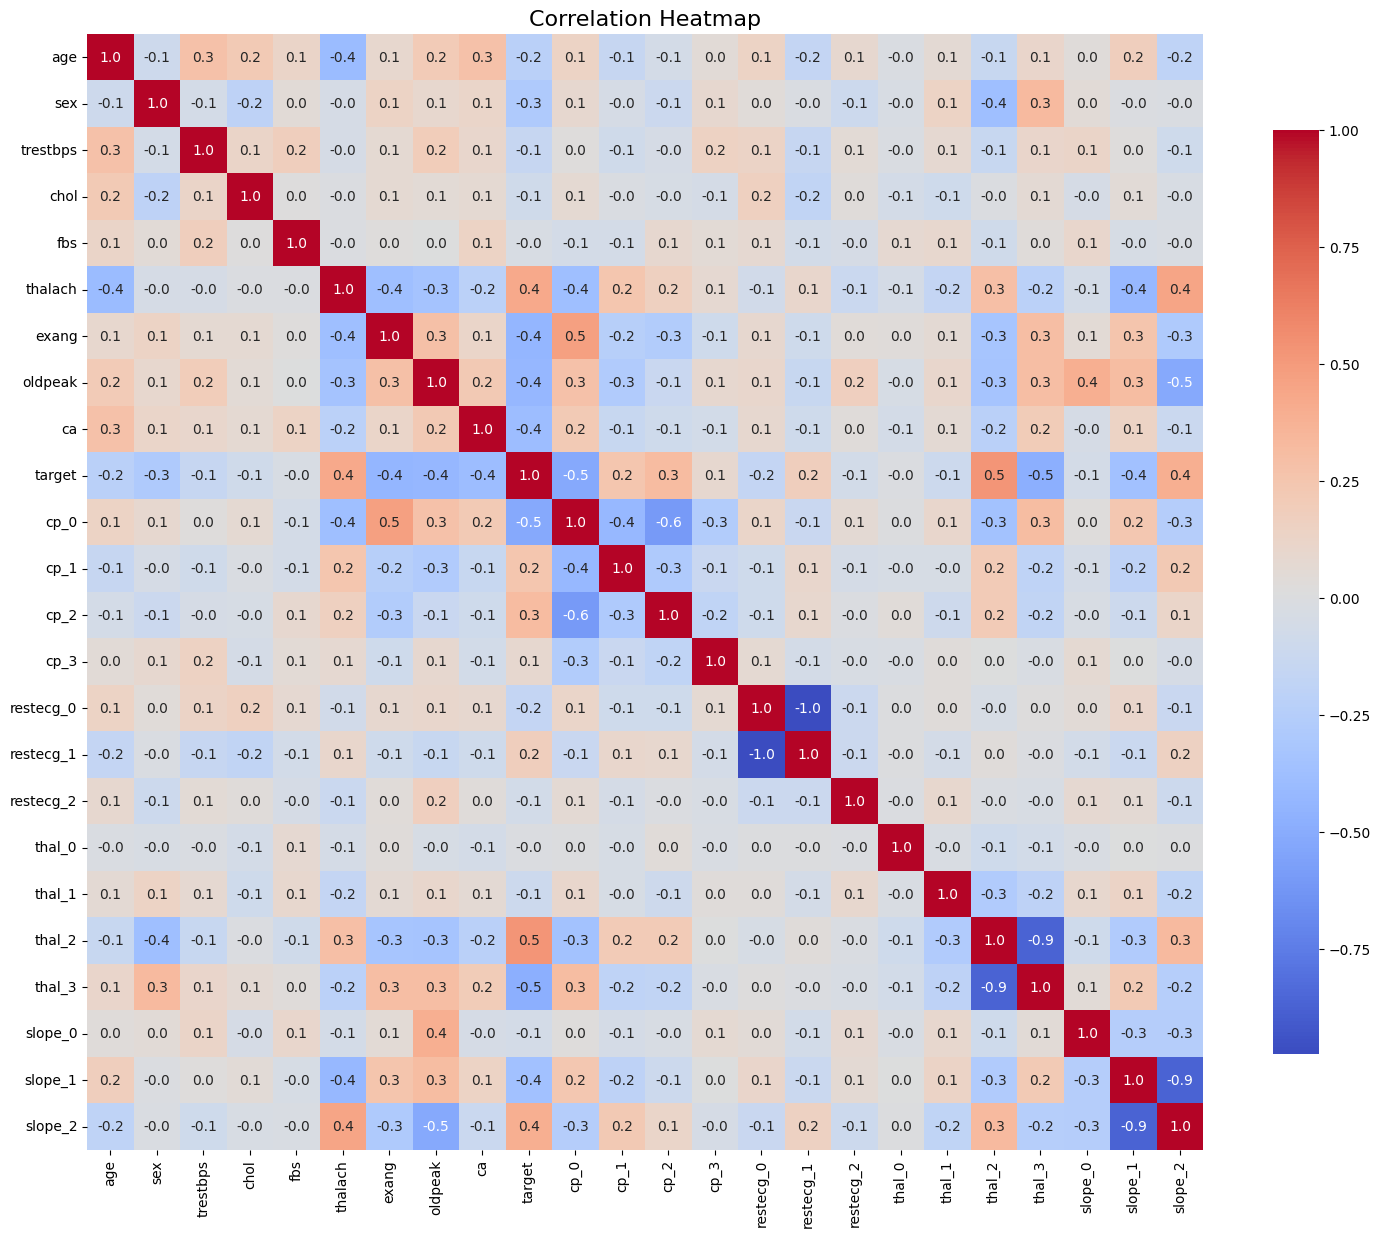

In [80]:
corr = df.corr()
plt.figure(figsize=(18, 15))
sns.heatmap(corr, annot=True, fmt='.1f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [102]:
correlated_features = set()
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        if abs(corr.iloc[i, j]) > 0.7 and i != j:
            # print(f'{corr.columns[i]} and {corr.columns[j]}: {corr.iloc[i, j]:.2f}')
            correlated_features.add((corr.columns[i], corr.columns[j]))
print(f'Correlated features: {correlated_features}')

Correlated features: {('slope_1', 'slope_2'), ('restecg_0', 'restecg_1'), ('thal_3', 'thal_2'), ('thal_2', 'thal_3'), ('restecg_1', 'restecg_0'), ('slope_2', 'slope_1')}


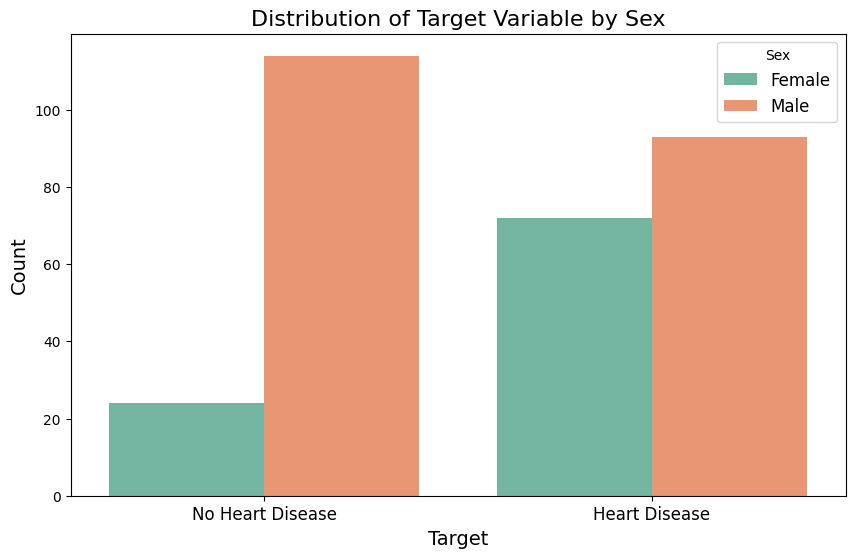

In [92]:
plt.figure(figsize=(10, 6))
sns.countplot(x='target', hue='sex', data=df, palette='Set2')
plt.title('Distribution of Target Variable by Sex', fontsize=16)
plt.xlabel('Target', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'], fontsize=12)
plt.legend(title='Sex', labels=['Female', 'Male'], fontsize=12)
plt.show()

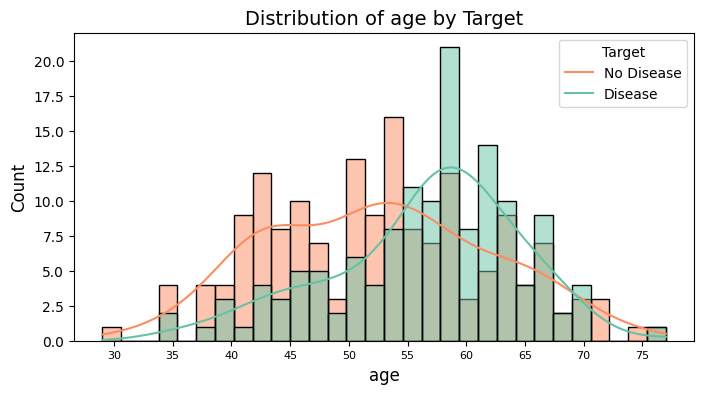

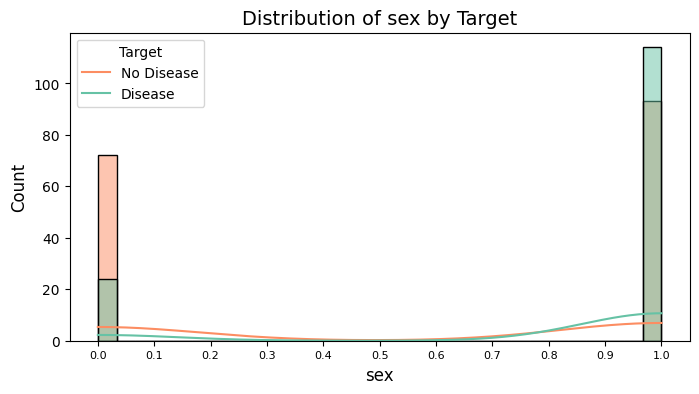

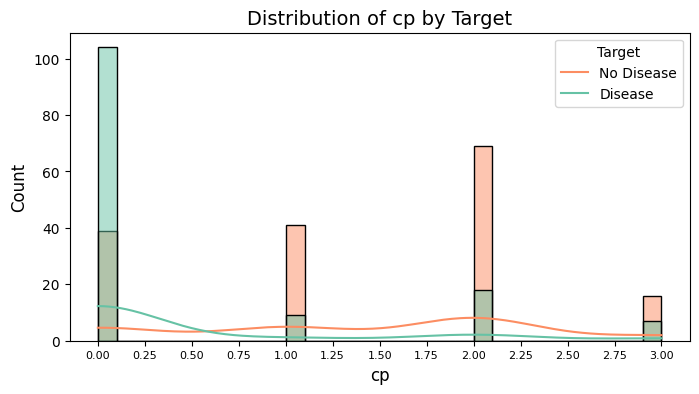

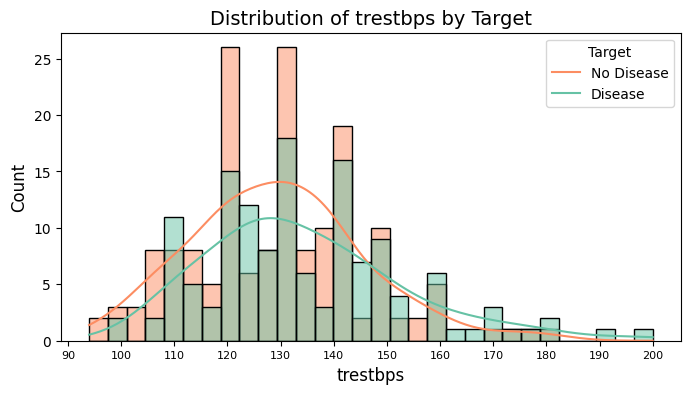

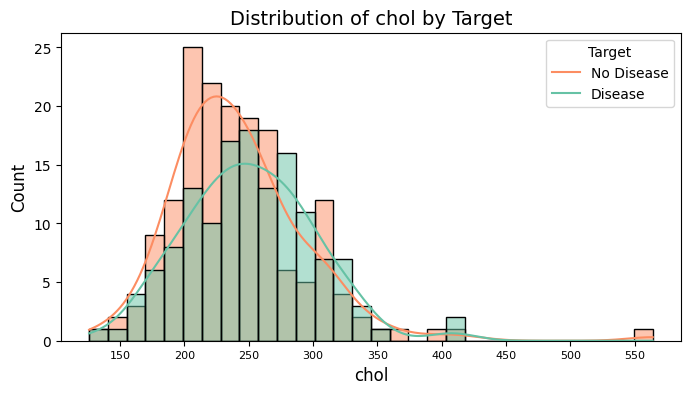

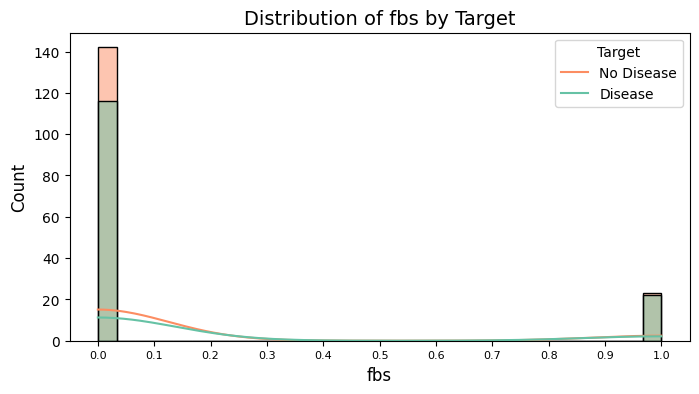

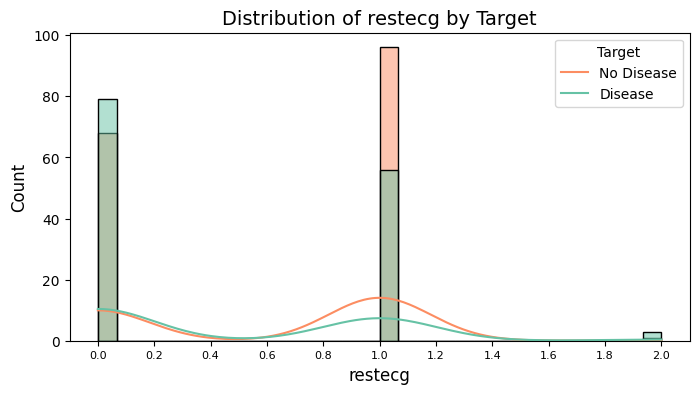

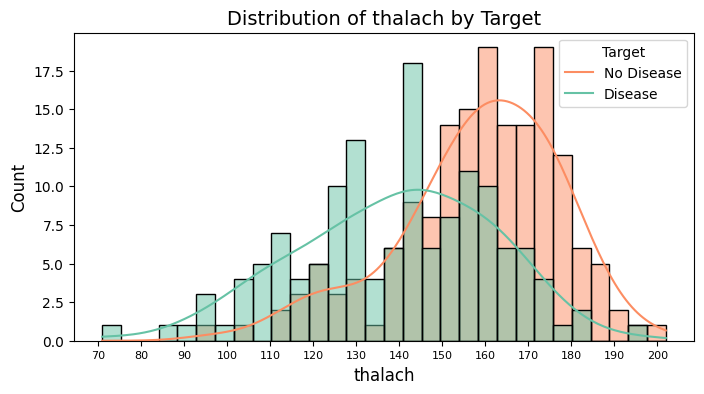

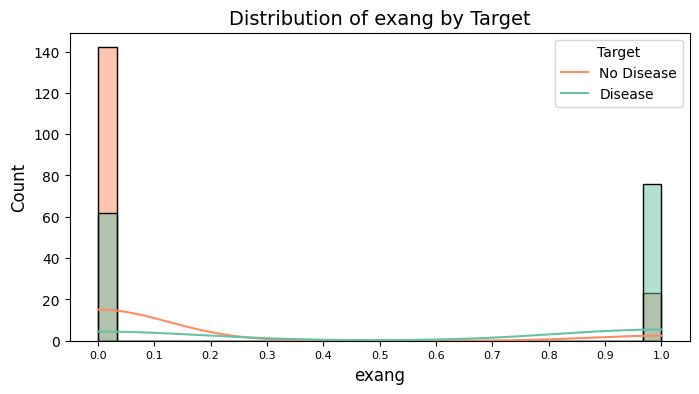

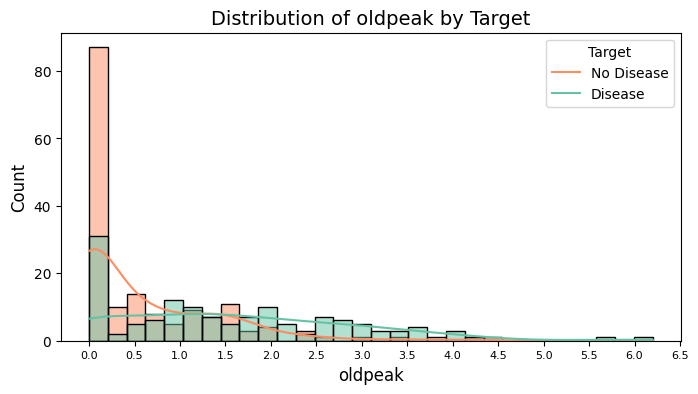

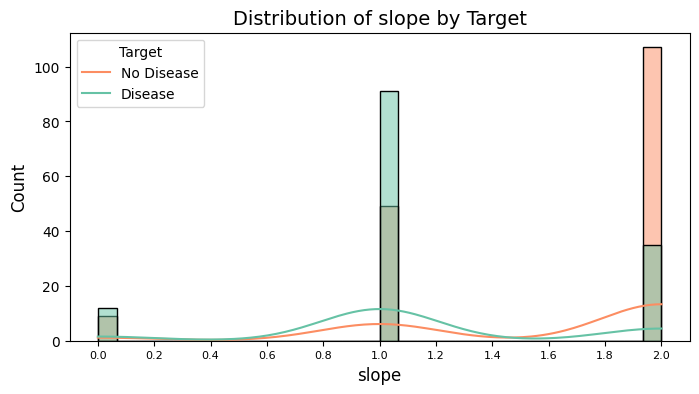

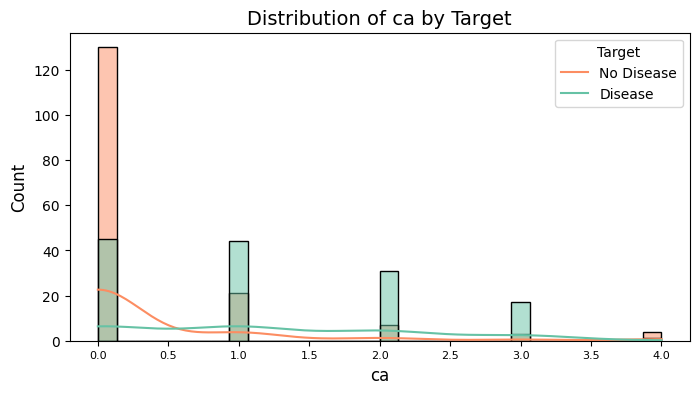

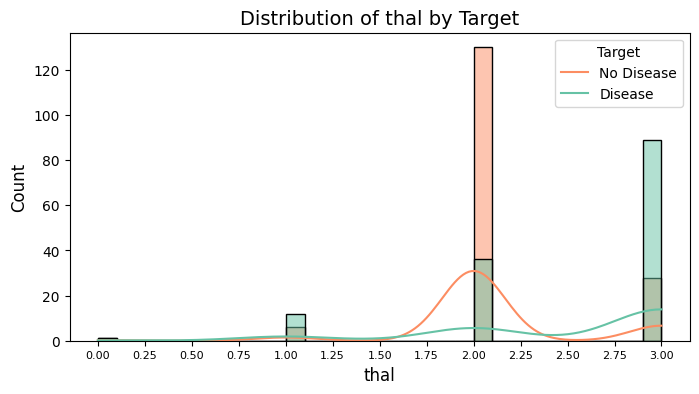

In [112]:
# Visualizing distributions of features with respect to the target variable
for column in df.columns:
    if column != 'target':  # Exclude the target column itself
        plt.figure(figsize=(8, 4))
        if df[column].dtype in ['int64', 'float64']:  # Numerical features
            sns.histplot(data=df, x=column, hue='target', kde=True, palette='Set2', bins=30)
            plt.title(f'Distribution of {column} by Target', fontsize=14)
            plt.xticks(fontsize=8)  # Keep font size without rotation
            plt.locator_params(axis='x', nbins=15)  # Increase number of X-axis ticks
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.legend(title='Target', labels=['No Disease', 'Disease'], fontsize=10)
        plt.show()

In [120]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [121]:
## catogrical columns -> cp , restecg, thal, slop
class CustomCategoricalEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        cat_features = ['cp', 'restecg', 'thal', 'slope']
        for i in range(len(cat_features)):
            encoder = OneHotEncoder()
            matrix = encoder.fit_transform(X[[cat_features[i]]]).toarray()
            feature_names = encoder.get_feature_names_out()
            for j in range(len(matrix.T)):
                X[feature_names[j]] = matrix.T[j]
            X.drop([cat_features[i]], axis=1, inplace=True)
        return X
    
class CustomStandardScaler(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        scaler = StandardScaler()
        num_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
        for i in range(len(num_features)):
            X[num_features[i]] = scaler.fit_transform(X[[num_features[i]]])
        return X
    

data_processing_pipeline = Pipeline(steps=[
    ('custom_categorical_encoder', CustomCategoricalEncoder()),
    ('custom_standard_scaler', CustomStandardScaler())
])
X = df.drop(['target'], axis=1)
y = df['target']
data_processing_pipeline.fit_transform(X)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_0,...,cp_3,restecg_0,restecg_1,restecg_2,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,0.937219,1,0.756938,-0.272801,1,0.019152,0,1.065587,0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,-1.937566,1,-0.090680,0.054821,0,1.632621,0,2.096070,0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-1.495292,0,-0.090680,-0.831685,0,0.978512,0,0.292725,0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.163238,1,-0.655759,-0.214985,0,1.240155,0,-0.222517,0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.273807,0,-0.655759,2.059094,0,0.586046,1,-0.394264,0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.273807,0,0.474399,-0.118626,0,-1.158244,1,-0.737759,0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
299,-1.053017,1,-1.220837,0.324627,0,-0.765779,0,0.120977,0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
300,1.490062,1,0.700430,-1.043675,1,-0.373314,0,2.010197,2,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
301,0.273807,1,-0.090680,-2.238530,0,-1.507103,1,0.120977,1,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [125]:
X.iloc[0]
X.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'restecg_0', 'restecg_1',
       'restecg_2', 'thal_1', 'thal_2', 'thal_3', 'slope_0', 'slope_1',
       'slope_2'],
      dtype='object')

In [123]:
df.iloc[0]

age          63.0
sex           1.0
cp            3.0
trestbps    145.0
chol        233.0
fbs           1.0
restecg       0.0
thalach     150.0
exang         0.0
oldpeak       2.3
slope         0.0
ca            0.0
thal          1.0
target        1.0
Name: 0, dtype: float64

Model: LogisticRegression
classification_report:
              precision    recall  f1-score   support

           0       0.78      0.89      0.83        35
           1       0.92      0.83      0.87        54

    accuracy                           0.85        89
   macro avg       0.85      0.86      0.85        89
weighted avg       0.86      0.85      0.86        89

cross_val_score: 0.8343502824858756
best parameters:  {'C': 1, 'solver': 'lbfgs'}


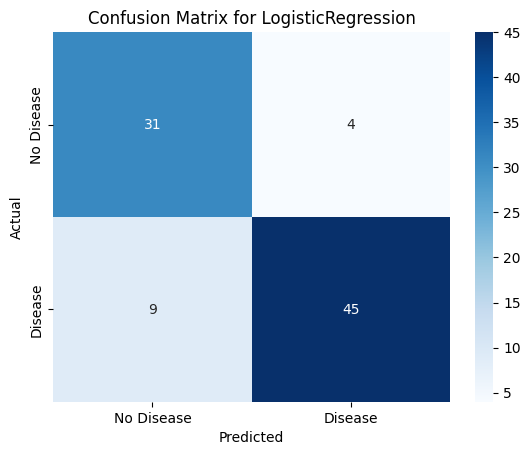

Model: DecisionTreeClassifier
classification_report:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79        35
           1       0.87      0.85      0.86        54

    accuracy                           0.83        89
   macro avg       0.82      0.83      0.82        89
weighted avg       0.83      0.83      0.83        89

cross_val_score: 0.7907909604519774
best parameters:  {'criterion': 'gini', 'max_depth': 3}


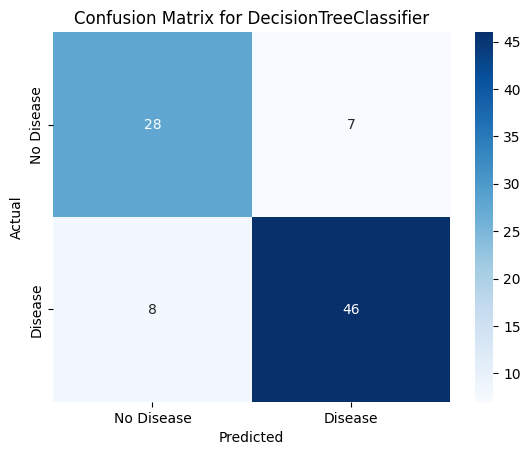

Model: RandomForestClassifier
classification_report:
              precision    recall  f1-score   support

           0       0.78      0.89      0.83        35
           1       0.92      0.83      0.87        54

    accuracy                           0.85        89
   macro avg       0.85      0.86      0.85        89
weighted avg       0.86      0.85      0.86        89

cross_val_score: 0.8242937853107346
best parameters:  {'max_depth': 5, 'n_estimators': 100}


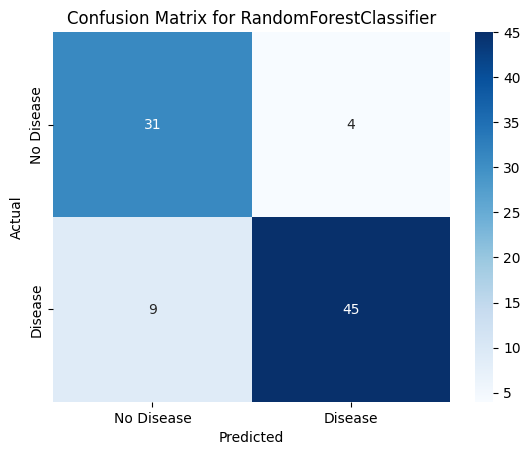

Model: SVC
classification_report:
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        35
           1       0.94      0.83      0.88        54

    accuracy                           0.87        89
   macro avg       0.86      0.87      0.86        89
weighted avg       0.88      0.87      0.87        89

cross_val_score: 0.8310169491525423
best parameters:  {'C': 10, 'kernel': 'linear'}


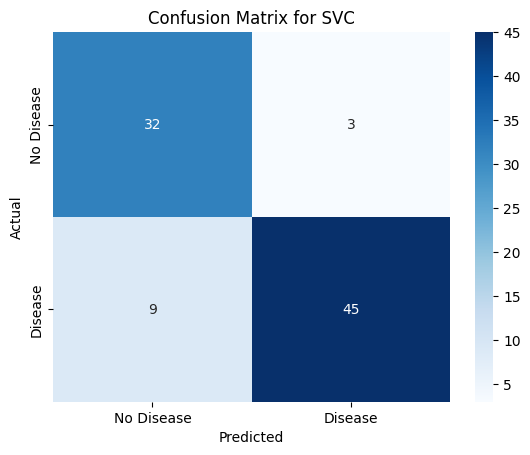

Model: KNeighborsClassifier
classification_report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        35
           1       0.90      0.87      0.89        54

    accuracy                           0.87        89
   macro avg       0.86      0.86      0.86        89
weighted avg       0.87      0.87      0.87        89

cross_val_score: 0.8108474576271186
best parameters:  {'n_neighbors': 7, 'weights': 'uniform'}


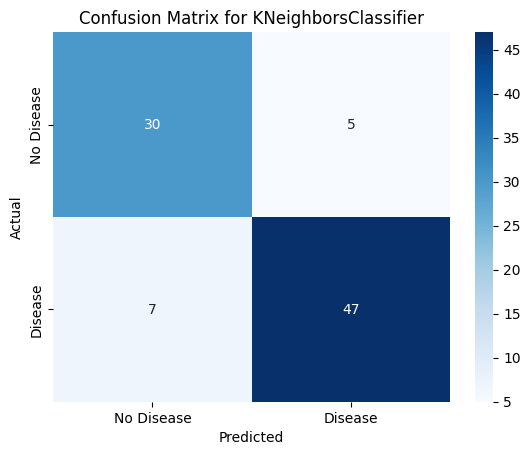

Model: GaussianNB
classification_report:
              precision    recall  f1-score   support

           0       0.82      0.94      0.88        35
           1       0.96      0.87      0.91        54

    accuracy                           0.90        89
   macro avg       0.89      0.91      0.90        89
weighted avg       0.91      0.90      0.90        89

cross_val_score: 0.817683615819209
best parameters:  {}


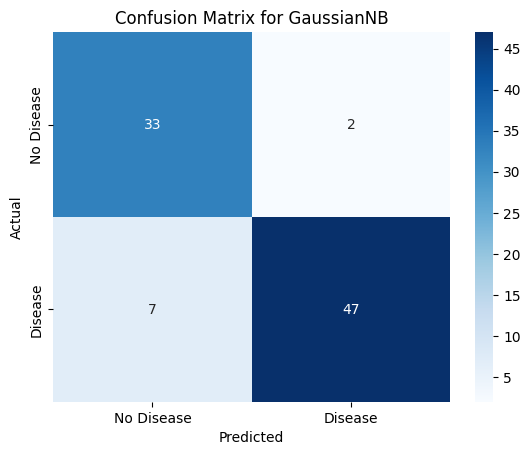

Text(0.5, 1.0, 'Model Accuracy Comparison')

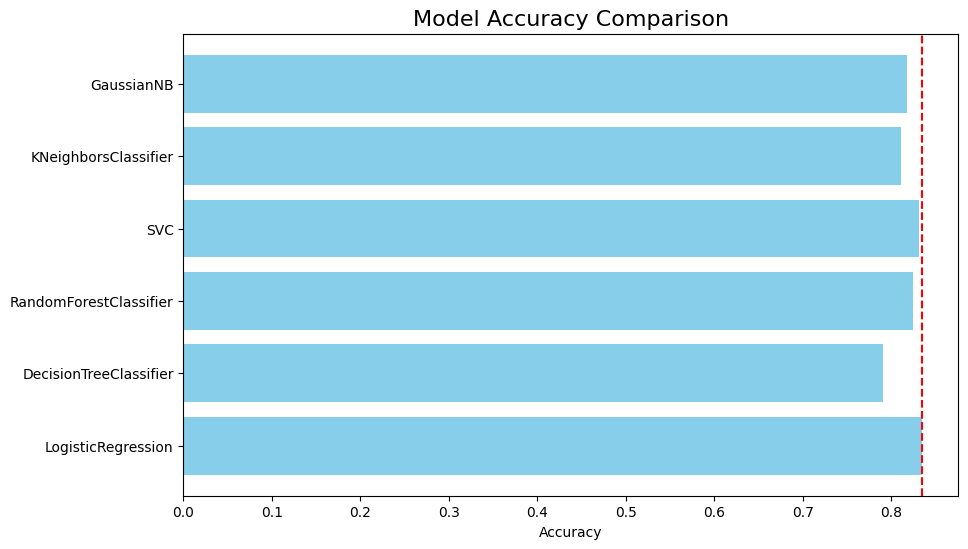

In [141]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score


# Define the models and their hyperparameters for GridSearchCV
models = {
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10],
            'solver': ['liblinear', 'lbfgs']
        }
    },
    'DecisionTreeClassifier': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [3, 5, 10, None]
        }
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_depth': [3, 5, 10, None]
        }
    },
    'SVC': {
        'model': SVC(probability=True),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    },
    'KNeighborsClassifier': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    },
    'GaussianNB': {
        'model': GaussianNB(),
        'params': {}
    }
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Perform GridSearchCV for each model
results = {}
for model_name, model_info in models.items():
    grid_search = GridSearchCV(model_info['model'], model_info['params'], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = cross_val_score(best_model, X, y, cv=5).mean()
    accuracy_report = classification_report(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    print(f"Model: {model_name}")
    print(f"classification_report:\n{accuracy_report}")
    print(f"cross_val_score: {cross_val_score(best_model, X, y, cv=5).mean()}")
    print("best parameters: ", grid_search.best_params_)
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()


# Plotting the accuracy of each model
plt.figure(figsize=(10, 6))
plt.barh(list(results.keys()), list(results.values()), color='skyblue')
plt.xlabel('Accuracy')  

best_model_name = max(results, key=results.get)
best_model_accuracy = results[best_model_name]
plt.axvline(x=best_model_accuracy, color='red', linestyle='--', label=f'Best Model: {best_model_name}')
plt.title('Model Accuracy Comparison', fontsize=16)


In [143]:
# {'C': 1, 'solver': 'lbfgs'}
model = LogisticRegression(C=1, solver='lbfgs')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression: {accuracy:.2f}")



Accuracy of Logistic Regression: 0.85


In [149]:
import joblib

# Train the model with all the data
final_model = LogisticRegression(C=1, solver='lbfgs')
final_model.fit(X, y)

# Evaluate the model
y_pred_all = final_model.predict(X)
accuracy_all = accuracy_score(y, y_pred_all)
classification_report_all = classification_report(y, y_pred_all)
confusion_mat_all = confusion_matrix(y, y_pred_all)

print(f"Accuracy on all data: {accuracy_all:.2f}")
print("Classification Report:\n", classification_report_all)



# Export the trained model as a .pkl file
joblib.dump(final_model, '../models/heartPred_model.pkl')
print("Model exported as 'heartPred_model.pkl'")

Accuracy on all data: 0.88
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.82      0.86       136
           1       0.86      0.93      0.89       160

    accuracy                           0.88       296
   macro avg       0.89      0.88      0.88       296
weighted avg       0.88      0.88      0.88       296

Model exported as 'heartPred_model.pkl'
